In [ ]:
#%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)


In [2]:
# Combine the data into a single dataset
# We want to merge outer on the Mouse ID so that we don't lose any data
combined_datasets = pd.merge(mouse_metadata_df, study_results_df, how = "outer", on = "Mouse ID")
combined_datasets.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
combined_datasets.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [42]:
#It looks like the counts across all columns are the same and we do not need to do a dropna()
drugs = combined_datasets["Drug Regimen"].unique()
drugs_df = pd.DataFrame({"Drug Names":drugs})
drugs_df

,Drug Names
0,Ramicane
1,Capomulin
2,Infubinol
3,Placebo
4,Ceftamin
5,Stelasyn
6,Zoniferol
7,Ketapril
8,Propriva
9,Naftisol


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen.
grouped_by_drug = combined_datasets.groupby(["Drug Regimen"])

grouped_mean = round(grouped_by_drug["Tumor Volume (mm3)"].mean(), 3)
grouped_median = round(grouped_by_drug["Tumor Volume (mm3)"].median(), 3)
grouped_var= round(grouped_by_drug["Tumor Volume (mm3)"].var(), 3)
grouped_std = round(grouped_by_drug["Tumor Volume (mm3)"].std(), 3)
grouped_sem = round(grouped_by_drug["Tumor Volume (mm3)"].sem(), 3)

grouped_by_drug_df = pd.DataFrame({"Tumor Volume Mean":grouped_mean, "Tumor Volume Median":grouped_median,
                                  "Tumor Volume Variance":grouped_var, "Tumor Volume Standard Deviation":grouped_std,
                                  "Tumor Volume SEM":grouped_sem})
grouped_by_drug_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


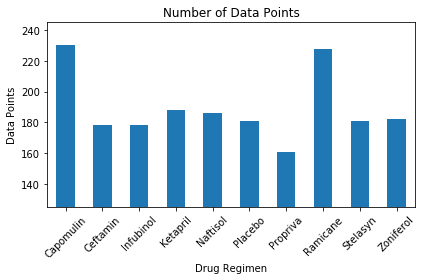

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas DataFrame.plot()
grouped_count = grouped_by_drug["Tumor Volume (mm3)"].count()
drug_df_bar = pd.DataFrame({"Number of Data Points":grouped_count})

pandas_bar = drug_df_bar.plot.bar(rot = 45, legend = False)
pandas_bar.set_ylim(125,245)
plt.ylabel("Data Points")
plt.title("Number of Data Points")
plt.tight_layout()

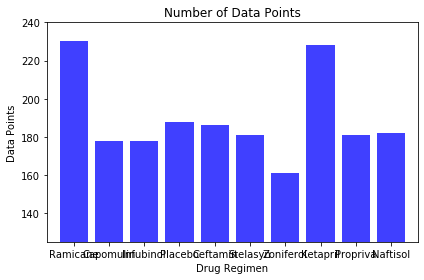

In [32]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0, len(grouped_by_drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.xlim(-0.75, len(grouped_by_drug)-.25)
plt.ylim(125, max(grouped_count) + 10)

plt.bar(x_axis, grouped_count, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs)
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and 
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen